In [ ]:
from google.colab import files
data = files.upload()

Saving heart.csv to heart.csv


In [ ]:
import pandas as pd

df = pd.read_csv('heart.csv')
print(df.describe())

              age         sex          cp  ...          ca        thal      target
count  303.000000  303.000000  303.000000  ...  303.000000  303.000000  303.000000
mean    54.366337    0.683168    0.966997  ...    0.729373    2.313531    0.544554
std      9.082101    0.466011    1.032052  ...    1.022606    0.612277    0.498835
min     29.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     47.500000    0.000000    0.000000  ...    0.000000    2.000000    0.000000
50%     55.000000    1.000000    1.000000  ...    0.000000    2.000000    1.000000
75%     61.000000    1.000000    2.000000  ...    1.000000    3.000000    1.000000
max     77.000000    1.000000    3.000000  ...    4.000000    3.000000    1.000000

[8 rows x 14 columns]


In [ ]:
factors = df[['age', 'sex', 'cp', 'chol', 'thalach', 'trestbps', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
result = df['target']

In [ ]:
from sklearn.model_selection import train_test_split

f_train, f_test, r_train, r_test = train_test_split(factors, result, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
f_train_scaled = sc.fit_transform(f_train)
f_test_scaled = sc.fit_transform(f_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(f_train_scaled, r_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
r_prediction = classifier.predict(f_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(r_test, r_prediction)
print(accuracy)

0.868421052631579


In [ ]:
labels = ['Yes', 'No']
actual_values = []
predicted_values = []

for data in r_test:
  if data == 1:
    actual_values.append('Yes')
  else:
    actual_values.append('No')

for data in r_prediction:
  if data == 1:
    predicted_values.append('Yes')
  else:
    predicted_values.append('No')

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
cm = confusion_matrix(actual_values, predicted_values, labels)
print(cm)

[[38  3]
 [ 7 28]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

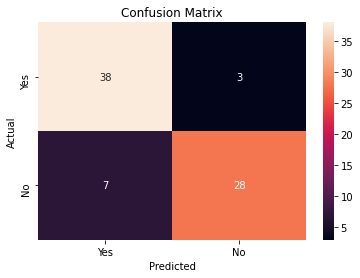

In [ ]:
axis = plt.subplot()
sb.heatmap(cm, annot = True, ax = axis)
axis.set_xlabel('Predicted')
axis.set_ylabel('Actual')
axis.set_title('Confusion Matrix')
axis.xaxis.set_ticklabels(labels)
axis.yaxis.set_ticklabels(labels)

In [ ]:
tp = 38
tn = 28
fp = 7
fn = 3

accu = (tp + tn)/(tp + tn + fp + fn)
print(accu)

0.868421052631579
